In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Rice Classification with CNN
Bu projede 5 çeşit pirinç türünü tanıyan CNN modeli geliştiriyoruz.
<br>
Kullanılan pirinç türleri aşağıdaki gibidir:
* Arborio
* Basmati
* Ipsala
* Jasmine
* Karacadag

Bu proje dosyası kaggle üzerinde oluşturulmuş ve buraya aktarılmıştır. Bu projede kullanılan veri setine [buradan](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/data) ulaşılabilir. 

![](https://storage.googleapis.com/kaggle-datasets-images/2049052/3399185/7b6d21bb13197d412ca73fa90a143395/dataset-cover.jpg?t=2022-04-03-02-16-40)

In [1]:
#/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (11154).jpg
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Öncelikle Resimlerin bulunduğu kök klasörün yolunu ve pirinç türlerinin etiketlerini belirleyelim

In [2]:
img_path="/kaggle/input/rice-image-dataset/Rice_Image_Dataset/"
labels = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

Dosya yolu ve etiketlerinden bir Data Frame oluşturalım

In [3]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+"/"+img_file)
        label_list.append(label)

In [4]:
df=pd.DataFrame({"img":img_list, "label":label_list})

In [5]:
df.sample(10)

,img,label
51713,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine
18412,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati
4068,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Arborio
71673,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
48843,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine
17445,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati
8385,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Arborio
17429,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati
68442,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
24217,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati


In [10]:
d={"Arborio":0, "Basmati":1, "Ipsala":2, "Jasmine":3, "Karacadag":4}
df["encode_label"]= df["label"].map(d)
df.sample(10)

,img,label,encode_label
33,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Arborio,0
58419,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine,3
30741,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala,2
73396,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag,4
63969,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag,4
17784,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati,1
53113,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine,3
7199,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Arborio,0
19698,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati,1
51872,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine,3


In [7]:
pirinc=cv2.imread(str(df["img"][0]))
pirinc.shape

(250, 250, 3)

Resimleri okuyup girdi veri setimizi oluşturalım

In [8]:
x=[]
for img in df["img"]:
    img=cv2.imread(str(img))
    img=cv2.resize(img, (50,50))
    img=img/255.0 
    x.append(img)

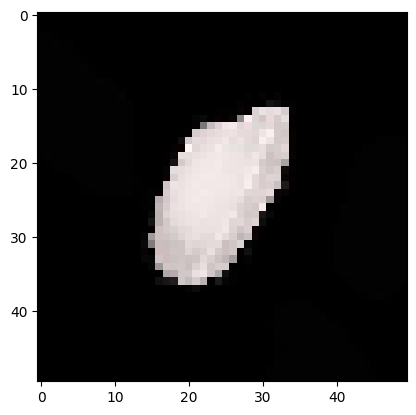

In [9]:
plt.imshow(x[0])

In [11]:
x=np.array(x)

In [12]:
y=df['encode_label']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

## Modelleme

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout,BatchNormalization, Reshape

In [16]:
model=Sequential()
model.add(Input(shape=(50,50,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=10, verbose=1)

Epoch 1/10
  48/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6607 - loss: 0.8997

I0000 00:00:1711307735.735863      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711307735.754810      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9336 - loss: 0.1919

W0000 00:00:1711307743.393626      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9336 - loss: 0.1917 - val_accuracy: 0.9754 - val_loss: 0.0674
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9837 - loss: 0.0496 - val_accuracy: 0.9866 - val_loss: 0.0401
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9899 - loss: 0.0306 - val_accuracy: 0.9871 - val_loss: 0.0417
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9923 - loss: 0.0236 - val_accuracy: 0.9929 - val_loss: 0.0213
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9950 - loss: 0.0145 - val_accuracy: 0.9925 - val_loss: 0.0244
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9952 - loss: 0.0135 - val_accuracy: 0.9964 - val_loss: 0.0116
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9956 - loss: 0.0129 - val_accuracy: 0.9950 - val_loss: 0.0157
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9960 - loss: 0.0106 - val_accura

In [18]:
model.save('rice_class_model.h5')

## Sonuç

Bu projede pirinç türlerini ayırt eden bir derin öğrenme modeli geliştirilmiştir. 